## 1.理解梯度上升算法：求-x^2+4x的最大值

In [3]:
def gradient(x):
    return -2*x+4

def gradient_Ascent():
    x_old = 0
    x_new = 1
    alpha = 0.001
    permission = 0.000001
    while(x_new-x_old>permission):#也可以设置最大迭代次数作为终止条件
        x_old = x_new
        x_new = x_old + alpha*gradient(x_old)
    return x_new

In [4]:
gradient_Ascent()

1.9995013500160062

## 2.逻辑回归中用梯度下降算法求回归系数

In [5]:
import numpy as np
from numpy import  mat
def loadDataSet():
    dataSet = [];classLabels = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataSet.append([1,float(lineArr[0]),float(lineArr[1])])
        classLabels.append(int(lineArr[2]))
    return dataSet,classLabels
#S型函数，任何数都可以通过该函数映射到0和1之间，而且h'(z) = h(z)(1-h(z))
def sigmoid(Z):
    return 1.0/(1+np.exp(-Z))

#逻辑回归梯度下降算法
def gradient_dscent(dataSet,classLabels):
    dataMat = mat(dataSet)
    labelMat = mat(classLabels).T
    m,n = dataMat.shape
    alpha = 0.001
    Iteration = 500
    weight = mat(np.ones((n,1)))
    for i in range(Iteration):
        h = sigmoid(dataMat*weight)
        error = h - labelMat
        weight = weight -alpha*dataMat.T*error
    return weight

In [6]:
dataSet,classLabels = loadDataSet()
weight = gradient_dscent(dataSet,classLabels)
weight

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## 3.通过求解的回归系数画出决策边界

In [7]:
#画出决策边界
import matplotlib.pyplot as plt
def plotBestFit(w):
    dataSet,classLabels = loadDataSet()
    dataArr = np.array(dataSet)
    n = dataArr.shape[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if(classLabels[i]==1):
            xcord1.append(dataArr[i,1]);ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]);ycord2.append(dataArr[i,2])
    plt.subplot(1,1,1)
    plt.scatter(xcord1,ycord1,s = 30,c = 'red',marker = 's')
    plt.scatter(xcord2,ycord2,s = 30,c = 'green',marker = 'o')
    x = np.arange(-3.0,3.0,0.1)
    y = (-w[0]-w[1]*x)/w[2]
    plt.plot(x,y)
    plt.xlabel('X1');plt.ylabel('X2')

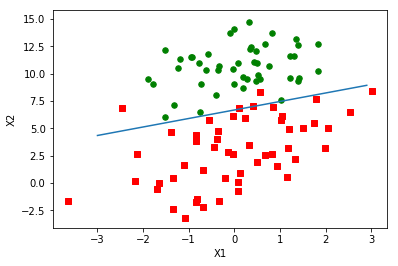

In [8]:
plotBestFit(np.array((weight)))

## 4.随机梯度下降算法

In [88]:
def stocGradDesc(dataSet,classLabels):
    a = np.array(dataSet)
    b = np.array(classLabels)
    m,n = a.shape
    alpha = 0.01
    weight2 = np.ones((1,3))
    weight2Arr = np.ones((1,3))
    for j in range(200):#在整个数据集上运行200次
        for i in range(m):
            h = sigmoid(np.sum(a[i]*weight2))#注意是按列求和
            error = h - b[i]
            weight2 = weight2 - alpha*a[i]*error
            weight2Arr = np.concatenate((weight2Arr,weight2),axis = 0)
    return weight2Arr

Text(0,0.5,'w0')

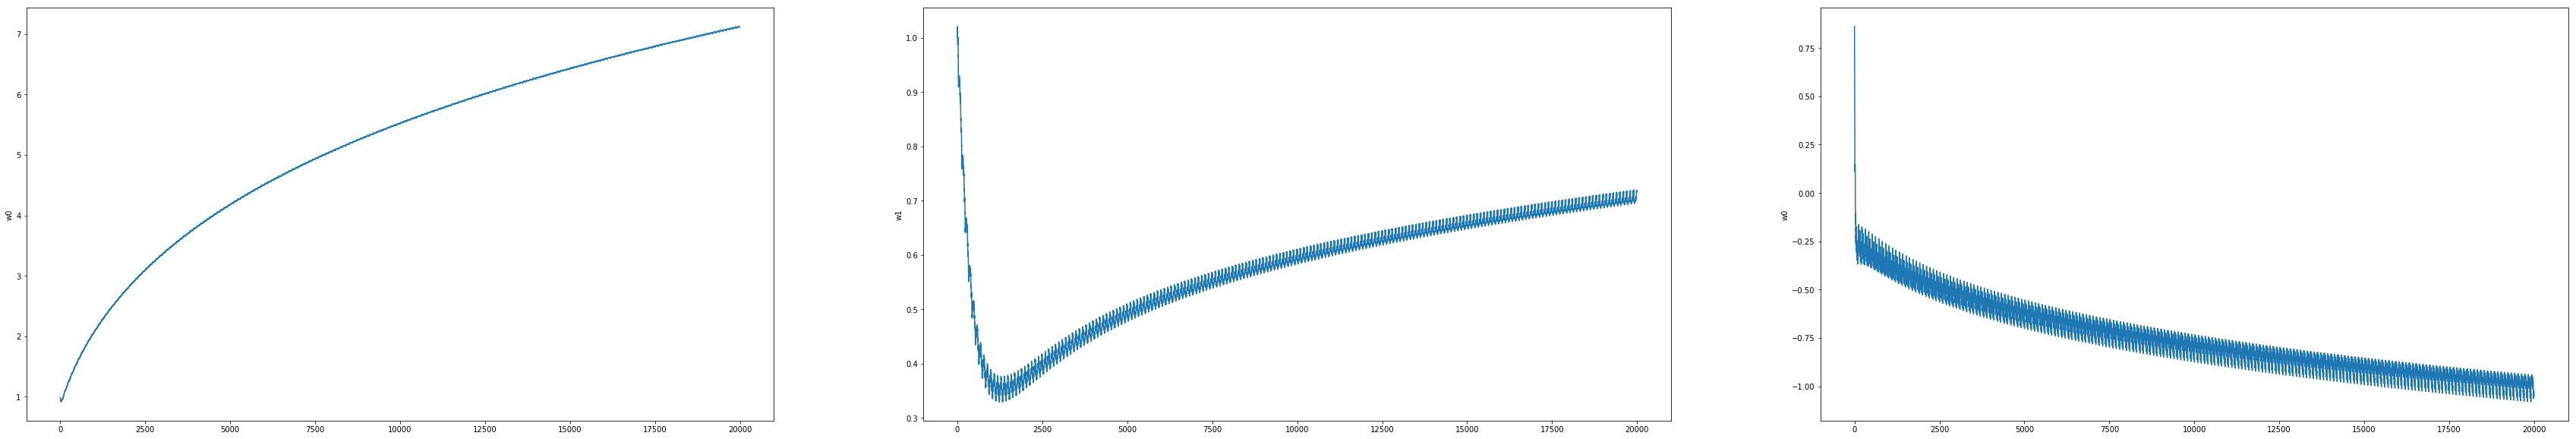

In [107]:
#随机梯度下降算法回归系数随迭代次数的变化情况
weight2Arr = stocGradDesc(dataSet,classLabels)
a = weight2Arr[1:,:]
fig,axs = plt.subplots(1,3,figsize=(60,10))
plt.subplot(1,3,1);plt.plot(np.arange(200*100),a[:,0]);plt.ylabel('w0')
plt.subplot(1,3,2);plt.plot(np.arange(200*100),a[:,1]);plt.ylabel('w1');plt.ylabel('w1')
plt.subplot(1,3,3);plt.plot(np.arange(200*100),a[:,2]);plt.ylabel('w0');plt.ylabel('w0')

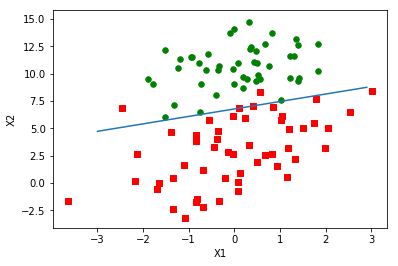

In [93]:
#随机梯度下降算法的决策边界
plotBestFit(np.array((weight2[-1].reshape(-1,1))))

## 5.改进的随机梯度下降算法
### alpha随着迭代次数不断减小
### 通过随机选取样本来更新回归系数

In [24]:
def stocGradDesc2(dataSet,classLabels):
    a = np.array(dataSet)
    b = np.array(classLabels)
    m,n = a.shape
    weight3 = np.ones((1,3))
    weight3Arr = np.ones((1,3))
    for j in range(20):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01#alpha随着迭代次数不断减小
            randIndex = int(np.random.uniform(0,len(dataIndex)))#通过随机选取样本来更新回归系数
            h = sigmoid(np.sum(a[randIndex]*weight3))
            error = h - b[randIndex]
            weight3 = weight3 - alpha*a[randIndex]*error
            weight3Arr = np.concatenate((weight3Arr,weight3),axis = 0)
            del(dataIndex[randIndex])
    return weight3Arr

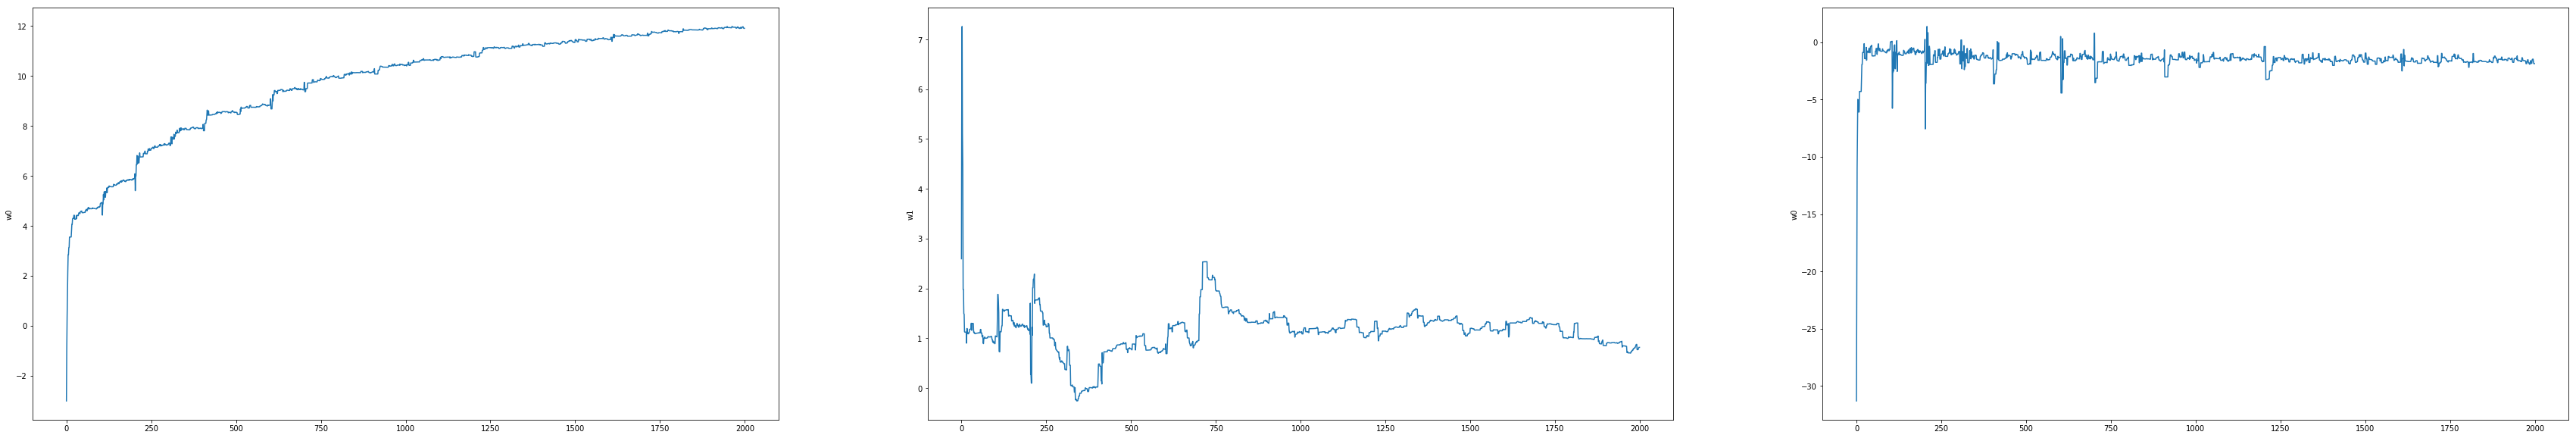

In [106]:
#改进随机梯度下降算法回归系数随迭代次数的变化情况
weight3Arr = stocGradDesc2(dataSet,classLabels)
a = weight3Arr[1:,:]
fig,axs = plt.subplots(1,3,figsize=(60,10))
plt.subplot(1,3,1);plt.plot(np.arange(20*100),a[:,0]);plt.ylabel('w0')
plt.subplot(1,3,2);plt.plot(np.arange(20*100),a[:,1]);plt.ylabel('w1');
plt.subplot(1,3,3);plt.plot(np.arange(20*100),a[:,2]);plt.ylabel('w0');

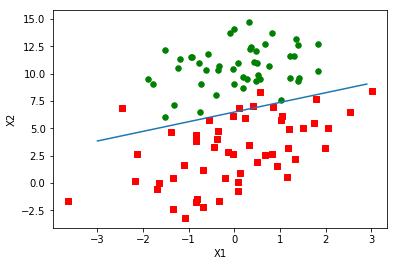

In [51]:
#改进的随机梯度下降算法的决策边界
plotBestFit((weight3[-1].reshape(-1,1)))